In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import numpy as np
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
with open('/kaggle/input/amazon-sentiment-analysis-models/cnn_pretrained_val_accs.pkl', 'rb') as f:
    cnn_pretrained_val_accs = pickle.load(f)
with open('/kaggle/input/amazon-sentiment-analysis-models/cnn_val_accs.pkl', 'rb') as f:
    cnn_val_accs = pickle.load(f)
with open('/kaggle/input/amazon-sentiment-analysis-models/bidirectional_lstm_val_accs.pkl', 'rb') as f:
    bidirectional_lstm_val_accs = pickle.load(f)
with open('/kaggle/input/amazon-sentiment-analysis-models/bidirectional_lstm_pretrained_val_accs.pkl', 'rb') as f:
    bidirectional_lstm_pretrained_val_accs = pickle.load(f)

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_pretrained_val_accs, label = "cnn_pretrained_val_accs")
plt.plot(cnn_val_accs, label = "cnn_val_accs")
plt.plot(bidirectional_lstm_val_accs, label = "bidirectional_lstm_val_accs")
plt.plot(bidirectional_lstm_pretrained_val_accs, label = "bidirectional_lstm_pretrained_val_accs")
plt.xlabel("Gradient descent steps")
plt.ylabel("Validation accuracy")
plt.legend()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(bidirectional_lstm_pretrained_val_accs, label = "bidirectional_lstm_pretrained_val_accs")
plt.plot(bidirectional_lstm_val_accs, label = "bidirectional_lstm_val_accs")
plt.xlabel("Gradient descent steps")
plt.ylabel("Validation accuracy")
plt.legend()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cnn_pretrained_val_accs, label = "cnn_pretrained_val_accs")
plt.plot(cnn_val_accs, label = "cnn_val_accs")
plt.xlabel("Gradient descent steps")
plt.ylabel("Validation accuracy")
plt.legend()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(bidirectional_lstm_pretrained_val_accs, label = "bidirectional_lstm_pretrained_val_accs")
plt.plot(cnn_pretrained_val_accs, label = "cnn_pretrained_val_accs")
plt.xlabel("Gradient descent steps")
plt.ylabel("Validation accuracy")
plt.legend()

In [ ]:
max(cnn_pretrained_val_accs)

In [ ]:
max(cnn_val_accs)

In [ ]:
max(bidirectional_lstm_val_accs)

In [ ]:
max(bidirectional_lstm_pretrained_val_accs)

In [3]:
ds_train = pd.read_csv("/kaggle/input/amazon-sentiment-analysis/Train.csv")
ds_val = pd.read_csv("/kaggle/input/amazon-sentiment-analysis/Valid.csv")
ds_test = pd.read_csv("/kaggle/input/amazon-sentiment-analysis/Test.csv")

In [4]:
(ds_train["Score"].value_counts() + ds_val["Score"].value_counts() + ds_test["Score"].value_counts()) / (ds_train.shape[0] + ds_val.shape[0] + ds_test.shape[0])

5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: Score, dtype: float64

In [5]:
ds_train["Score"] -= 1
ds_val["Score"] -= 1
ds_test["Score"] -= 1

In [6]:
def take_subset(ds_train, ds_val, ds_test, percentage):
    return ds_train[:int(ds_train.shape[0] * percentage)], ds_val[:int(ds_val.shape[0] * percentage)], ds_test[:int(ds_test.shape[0] * percentage)]

In [7]:
ds_train, ds_val, ds_test = take_subset(ds_train, ds_val, ds_test, 0.1)

In [8]:
model = tf.keras.models.load_model("/kaggle/input/amazon-sentiment-analysis-models/final_model/kaggle/working/final_model.tf")

In [9]:
test_texts = [[text] for text in ds_test["Text"]]

In [10]:
predictions = model.predict(test_texts)

178/178 [==============================] - 9s 48ms/step


In [11]:
predicted_labels = np.argmax(predictions, axis = 1)

In [12]:
true_labels = np.array(ds_test["Score"])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

In [14]:
accuracy_score(true_labels, predicted_labels)

0.703905700211119

In [23]:
ds_test[true_labels == predicted_labels][ds_test[true_labels == predicted_labels]["Score"] == 0].iloc[10]["Text"]

'well review really good coffee decide buy bulk big mistake maybe taste different taste like taste mouth night whiskey cigarettes never buy'

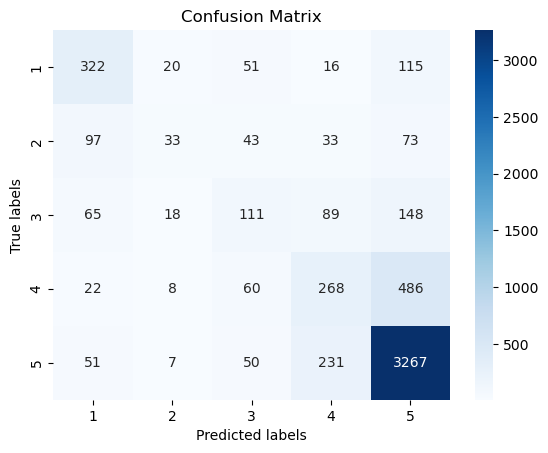

In [16]:
ax= plt.subplot()
cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=plt.cm.Blues);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([1, 2, 3, 4, 5]); ax.yaxis.set_ticklabels([1, 2, 3, 4, 5]);

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(true_labels, predicted_labels)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1-score: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.57809695 0.38372093 0.35238095 0.42072214 0.79897285]
recall: [0.61450382 0.11827957 0.2575406  0.31753555 0.90599002]
f1-score: [0.59574468 0.18082192 0.29758713 0.36191762 0.84912281]
support: [ 524  279  431  844 3606]


In [18]:
print('macro-average f1-score: ', sum(fscore) / len(fscore))

macro-average f1-score:  0.4570388320543336


In [26]:
text = "I feel terrible when using this chair"
text = [[text]]
prediction = model.predict(text) + 1
predicted_label= np.argmax(prediction, axis = 1) + 1
print("Predicted label: ", predicted_label)

1/1 [==============================] - 0s 50ms/step
Predicted label:  [1]
